# Embeddings Visualization by Embeddings Models

In [1]:
#from tqdm import tqdm
from tqdm.notebook import tqdm
from langchain.vectorstores import Chroma

import chromadb

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

### Create Document Embedddings

Note: To create the embeddings uncomment the blocks in this section

In [2]:
# local imports
from products_doc import ProductsDocs, create_embeddings, embedding_function

In [3]:
# %%time
# # Embeddings Functions with Mistral
# create_embeddings(collection_name='monitoring-mistral', 
#                   embedding_provider='mistral',
#                   ocp_sections=['monitoring'])

In [4]:
# %%time
# # Embeddings Functions with Microsoft Phi2
# create_embeddings(collection_name='monitoring-phi2', 
#                   embedding_provider='phi2',
#                   ocp_sections=['monitoring'])

In [5]:
# %%time
# # Embeddings Functions with OpenAI
# create_embeddings(collection_name='monitoring-openai', 
#                   embedding_provider='openai',
#                   ocp_sections=['monitoring'])

In [6]:
# %%time
# # Embeddings Functions with "BAAI/bge-large-en-v1.5"
# create_embeddings(collection_name='monitoring-bge', 
#                   embedding_provider=None,
#                   ocp_sections=['monitoring'])

### Load Embedded Datasets

Note: This section assumes the chroma database to exist

In [7]:
# persist data between sessions
persistent_client_mistral = chromadb.PersistentClient(path="./chroma")
persistent_client_phi2 = chromadb.PersistentClient(path="./chroma")
persistent_client_openai = chromadb.PersistentClient(path="./chroma")
persistent_client_bge = chromadb.PersistentClient(path="./chroma")

In [8]:
persistent_client_mistral.list_collections()

[Collection(name=monitoring-openai),
 Collection(name=monitoring-bge),
 Collection(name=OpenShift),
 Collection(name=monitoring-mistral),
 Collection(name=monitoring-phi2)]

In [9]:
# Ollama (mistral)
vectordb_mistral = Chroma(
    client=persistent_client_mistral,
    collection_name='monitoring-mistral',
    embedding_function=embedding_function('mistral'),
)

# Ollama Phi2
vectordb_phi2 = Chroma(
    client=persistent_client_phi2,
    collection_name="monitoring-phi2",
    embedding_function=embedding_function('phi2'),
)

# OpenAI
vectordb_openai = Chroma(
    client=persistent_client_openai,
    collection_name="monitoring-openai",
    embedding_function=embedding_function('openai'),
)

# "BAAI/bge-large-en-v1.5"
vectordb_bge = Chroma(
    client=persistent_client_bge,
    collection_name="monitoring-bge",
    embedding_function=embedding_function(),
)

In [10]:
#vectordb_mistral.get(include=['embeddings'])['embeddings']

In [11]:
# load visualization libraries

In [12]:
%load_ext autoreload
%autoreload 2

import viz_tools as viz

In [13]:
%%time
# mistral
mistral_projected_dataset_embeddings = viz.get_dataset_projected_embeddings(vectordb_mistral)
#mistral_projected_dataset_embeddings

  0%|          | 0/428 [00:00<?, ?it/s]

CPU times: user 5min 1s, sys: 10.4 s, total: 5min 11s
Wall time: 5min 5s


In [14]:
%%time
# phi2
phi2_projected_dataset_embeddings = viz.get_dataset_projected_embeddings(vectordb_phi2)
#phi2_projected_dataset_embeddings

  0%|          | 0/428 [00:00<?, ?it/s]

CPU times: user 5min 18s, sys: 12.3 s, total: 5min 30s
Wall time: 5min 23s


In [15]:
%%time
# openai
openai_projected_dataset_embeddings = viz.get_dataset_projected_embeddings(vectordb_openai)
#openai_projected_dataset_embeddings

  0%|          | 0/428 [00:00<?, ?it/s]

CPU times: user 5min 6s, sys: 10.6 s, total: 5min 16s
Wall time: 5min 10s


In [16]:
%%time
# bge
bge_projected_dataset_embeddings = viz.get_dataset_projected_embeddings(vectordb_bge)
#bge_projected_dataset_embeddings

  0%|          | 0/428 [00:00<?, ?it/s]

CPU times: user 5min 10s, sys: 10.6 s, total: 5min 20s
Wall time: 5min 14s


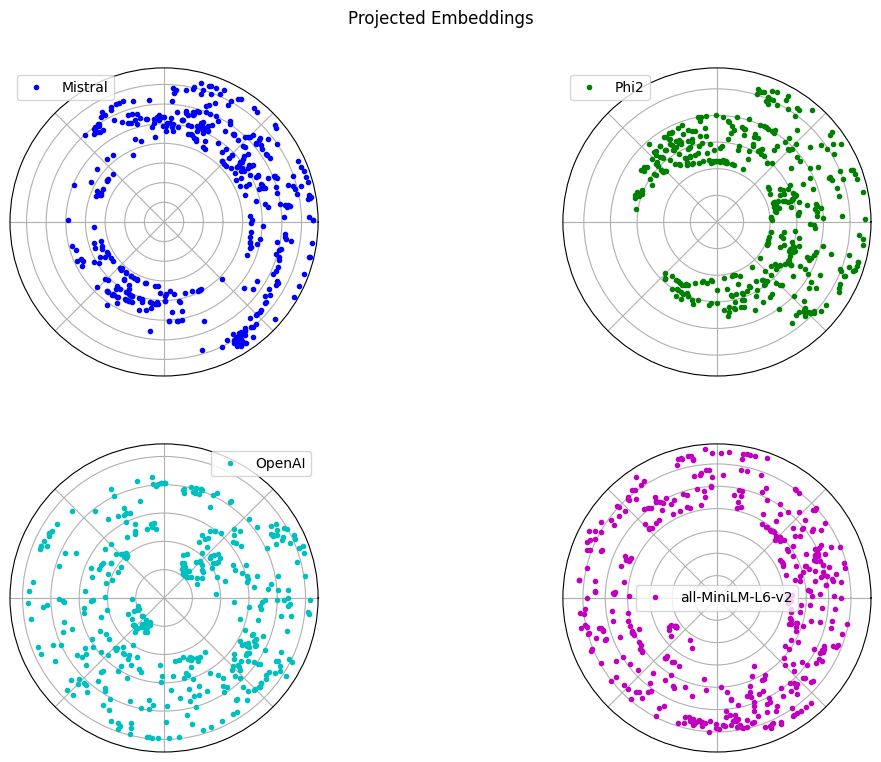

In [17]:
# quad plot polar
viz.plot_embeddings(mistral_projected_dataset_embeddings[0],
                    phi2_projected_dataset_embeddings[0],
                    openai_projected_dataset_embeddings[0],
                    bge_projected_dataset_embeddings[0])

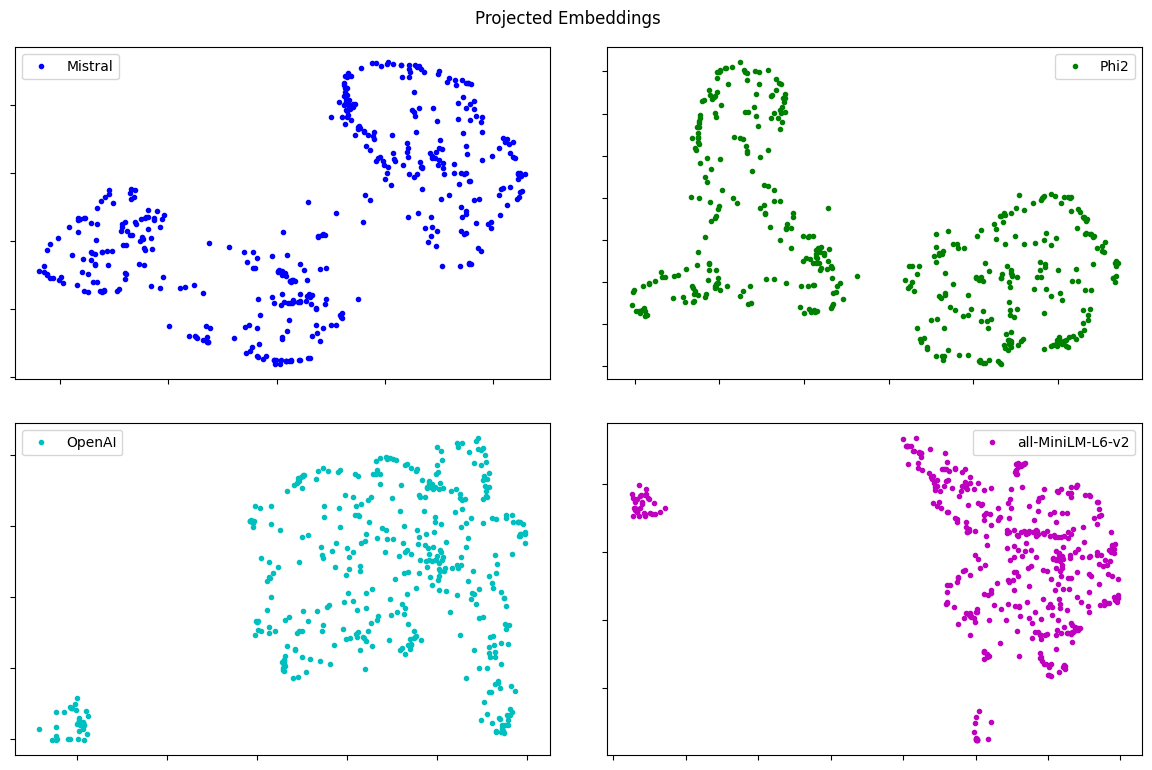

In [18]:
# quad plot
viz.plot_embeddings2d(mistral_projected_dataset_embeddings[0],
                      phi2_projected_dataset_embeddings[0],
                      openai_projected_dataset_embeddings[0],
                      bge_projected_dataset_embeddings[0])